<a href="https://colab.research.google.com/github/Gavin-Moss/Python-for-Math/blob/main/Steps2Convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [8]:
# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's value at that x value
def poly_point(poly_coeffs, x):
  degree = len(poly_coeffs) - 1
  result = 0
  for i in range(degree + 1):
    result += poly_coeffs[i] * x ** (degree - i)
  return result

# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's derivative at that x value
def poly_dev(poly_coeffs, x):
  new_coeffs = np.arange(len(poly_coeffs))[:0:-1] * np.array(poly_coeffs)[:-1]
  return poly_point(new_coeffs, x)

In [9]:
# A function that takes in the coefficients of a polynomial, an x value, and a number of steps, then applies Newton's Method for the amount of steps or until terminal behaivor is reached (to 15 digits of precision)
def poly_newton(poly_coeffs, x, steps=100):
  x0 = x
  x_list = []
  for i in range(steps):
    x0 -= poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)  # Newton's Method: x1 = x0 - f(x0) / f'(x0)
    if x0 in x_list:  # If x0 ever becomes what it was before (to 15 digits of precision), then it will begin repeating itself and more calculations are not needed
      return i
    x_list.append(x0)  # Adds each x0 to a list
  return i  # If all of the steps are completed without a repeat x0 being found, returns last x0

In [11]:
def complex_NM(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):
  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]

  # Initializes the image array
  img_arr = np.zeros([y_res, x_res, 3], dtype='uint8')

  # Calculates several variables that will be used later
  roots = np.roots(poly_coeffs)
  print(roots)  # Prints the complex roots of the polynomial, which may be useful when looking at the final image
  real_min = min(roots.real)
  real_max = max(roots.real)
  imag_min = min(roots.imag)
  imag_max = max(roots.imag)
  
  real_mid = (real_min + real_max) / 2
  imag_mid = (imag_min + imag_max) / 2

  e = 2.71828
  p = (real_min - real_max) / 2.7726
  q = (imag_min - imag_max) / 2.7726
  # See text box below for significance of these variables

  # Creates the image
  for i in range(y_res):
    if i % 10 == 0:
      print(i, end='  ')
      # Prints the number of completed rows every 10 completed rows
    for j in range(x_res):
      num_steps = poly_newton(poly_coeffs, x_values[i, j], steps)  # Performs Newton's Method on every pixel
      img_arr[i, j] = [int((255/steps) * num_steps)] * 3  # Assigns the pixel a color according to the result of Newton's Method
      # See text box below for explanation

  # Displays image
  img = Image.fromarray(img_arr)
  display(img)

200 200
[-1.55299029+0.j          1.45422959+1.07056853j  1.45422959-1.07056853j
  0.32226556+1.13066849j  0.32226556-1.13066849j]
0  10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  

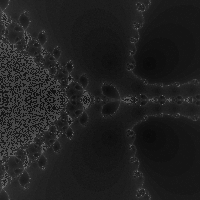

In [ ]:
coeffs = [1, -2, 1, 4, -5, 7]
complex_NM(coeffs, [-3, -3], [3, 3], 200, steps=100)

In [12]:
def MATPLOTLIB_complex(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):
  #first lest make the resolution of the image

  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]

  # Initializes the image array
  img_arr = np.zeros([y_res, x_res, 3], dtype='uint8')
  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  #the very end, should display the matplotlib image, andres' example used hexbin
  #NOTE: im using google to see what the inputs of hexbin are
  plt.hexbin(x_,y_res, edgecolor = 'face',)